In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import ast

from gensim.models import Word2Vec

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("final.csv")

In [3]:

df['tweet_tokens'] = df['tweet_tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# TF IDF

In [4]:


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tweet_new'])  
y = df['BinaryNumTarget'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:

# Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print(f"{name}: Accuracy={acc:.4f}")
    print("Klasa 0:", round(df_report.loc['0', 'f1-score'], 3))
    print("Klasa 1:", round(df_report.loc['1', 'f1-score'], 3))

    # Calculate word importance for Random Forest and XGBoost
    if name == "Random Forest":
        importances = model.feature_importances_
        feature_names = vectorizer.get_feature_names_out()
        feature_importances_rf = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values(by='importance', ascending=False)

        print("Random Forest Feature Importances:")
        print(feature_importances_rf.head(10))  

    elif name == "XGBoost":
        importances = model.get_booster().get_score(importance_type='weight')
   
        feature_names = vectorizer.get_feature_names_out()
        feature_importances_xgb = pd.DataFrame({
            'feature': [feature_names[int(f[1:])] for f in importances.keys()],
            'importance': list(importances.values())
        }).sort_values(by='importance', ascending=False)

        print("XGBoost Feature Importances:")
        print(feature_importances_xgb.head(10)) 


Random Forest: Accuracy=0.9792
Klasa 0: 0.979
Klasa 1: 0.98
Random Forest Feature Importances:
                 feature  importance
677                biden    0.051596
4734             vaccine    0.033570
2518                 joe    0.012656
1197               covid    0.011630
602              ballots    0.010140
2834           marijuana    0.009223
3305              pelosi    0.008648
4731          vaccinated    0.008310
4804                wage    0.007920
2283  hydroxychloroquine    0.006923


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:44:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.9625
Klasa 0: 0.961
Klasa 1: 0.964
XGBoost Feature Importances:
          feature  importance
81          biden        79.0
615         trump        39.0
591           tax        28.0
161         covid        24.0
628       vaccine        22.0
150  convalescent        20.0
71        ballots        19.0
465        pelosi        16.0
437         obama        15.0
674         years        15.0


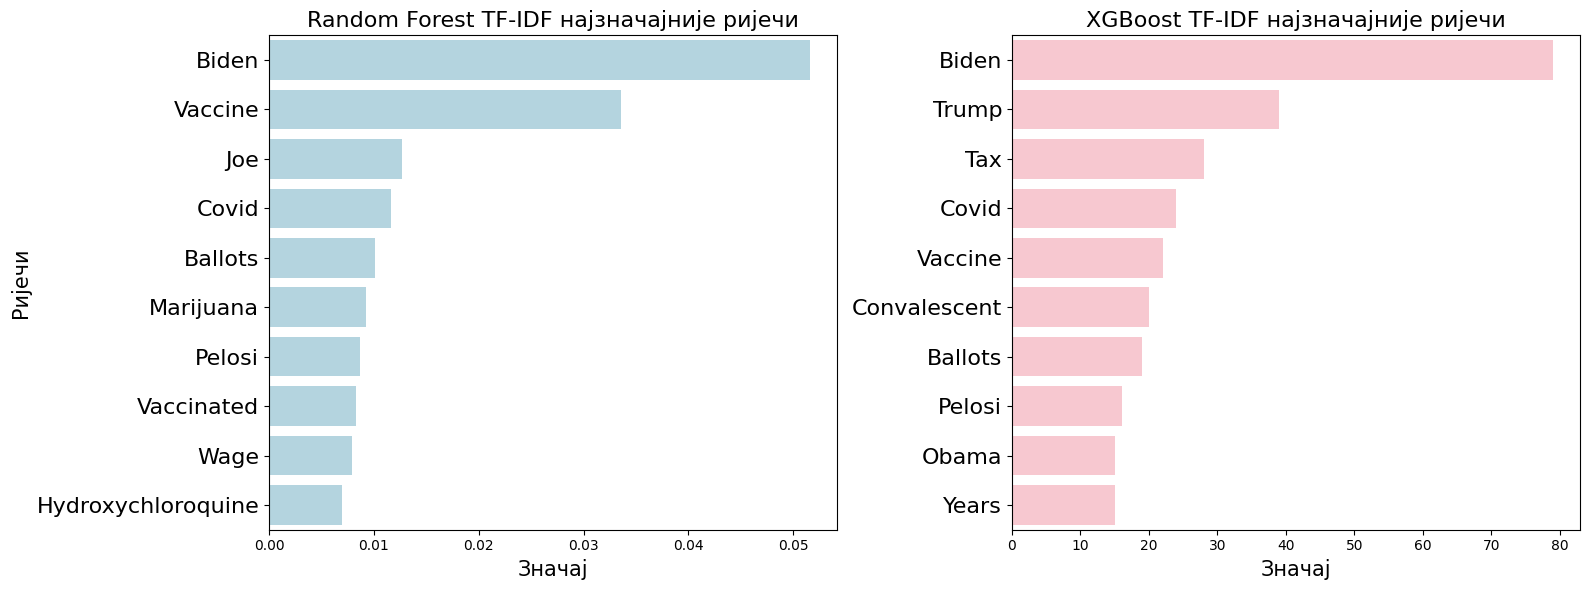

In [15]:

rf_top_features = feature_importances_rf.head(10).copy()
rf_top_features['feature'] = rf_top_features['feature'].str.capitalize()

xgb_top_features = feature_importances_xgb.head(10).copy()
xgb_top_features['feature'] = xgb_top_features['feature'].str.capitalize()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Random Forest график
sns.barplot(ax=axes[0], x='importance', y='feature', data=rf_top_features, color='lightblue')
axes[0].set_title("Random Forest TF-IDF најзначајније ријечи", fontsize=16)
axes[0].set_xlabel("Значај", fontsize=15)
axes[0].set_ylabel("Ријечи", fontsize=15)
axes[0].tick_params(axis='y', labelsize=16)

# XGBoost график
sns.barplot(ax=axes[1], x='importance', y='feature', data=xgb_top_features, color='pink')
axes[1].set_title("XGBoost TF-IDF најзначајније ријечи",fontsize=16)
axes[1].set_xlabel("Значај", fontsize=15)
axes[1].set_ylabel("")  
axes[1].tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()


In [7]:
# TF IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tweet_new'])  
y = df['BinaryNumTarget'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),  
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')
    weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')




    results[name] = (acc, prec, rec, macro_f1, weighted_f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1 Macro={macro_f1:.4f}, F1 Weighted={weighted_f1:.4f}")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print("Klasa 0:", round(df_report.loc['0', 'f1-score'], 3))
    print("Klasa 1:", round(df_report.loc['1', 'f1-score'], 3))

Random Forest: Accuracy=0.9802, Precision=0.9829, Recall=0.9786, F1 Macro=0.9802, F1 Weighted=0.9802
Klasa 0: 0.98
Klasa 1: 0.981
Decision Tree: Accuracy=0.9681, Precision=0.9676, Recall=0.9707, F1 Macro=0.9681, F1 Weighted=0.9681
Klasa 0: 0.967
Klasa 1: 0.969
Naive Bayes: Accuracy=0.9452, Precision=0.9385, Recall=0.9565, F1 Macro=0.9451, F1 Weighted=0.9452
Klasa 0: 0.943
Klasa 1: 0.947
KNN: Accuracy=0.7335, Precision=0.6596, Recall=0.9994, F1 Macro=0.7076, F1 Weighted=0.7104
Klasa 0: 0.621
Klasa 1: 0.795
SVM: Accuracy=0.9789, Precision=0.9778, Recall=0.9814, F1 Macro=0.9789, F1 Weighted=0.9789
Klasa 0: 0.978
Klasa 1: 0.98


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:04:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.9625, Precision=0.9493, Recall=0.9796, F1 Macro=0.9624, F1 Weighted=0.9624
Klasa 0: 0.961
Klasa 1: 0.964
Logistic Regression: Accuracy=0.9751, Precision=0.9731, Recall=0.9788, F1 Macro=0.9751, F1 Weighted=0.9751
Klasa 0: 0.974
Klasa 1: 0.976


In [8]:
'''
param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan'],

}
knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters for KNN: {grid_search.best_params_}")


best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"KNN: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")'''


'\nparam_grid = {\n    \'n_neighbors\': [3, 5, 7],\n    \'metric\': [\'euclidean\', \'manhattan\'],\n\n}\nknn = KNeighborsClassifier()\n\n\ngrid_search = GridSearchCV(knn, param_grid, cv=3, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\nprint(f"Best parameters for KNN: {grid_search.best_params_}")\n\n\nbest_knn = grid_search.best_estimator_\ny_pred = best_knn.predict(X_test)\n\n\nacc = accuracy_score(y_test, y_pred)\nprec = precision_score(y_test, y_pred)\nrec = recall_score(y_test, y_pred)\nf1 = f1_score(y_test, y_pred)\n\nprint(f"KNN: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")'

# Word2Vec

In [9]:


sentences = df['tweet_tokens'].tolist()

w2v_model = Word2Vec(sentences, vector_size=300, window=10, min_count=5, workers=4,sg=1, negative=10)

def vectorize_tweet(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vectors) == 0:
        return np.zeros(w2v_model.vector_size)
    else:
        return np.mean(vectors, axis=0)

X = np.array([vectorize_tweet(tokens) for tokens in df['tweet_tokens']])
y = df['BinaryNumTarget'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')
    weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')




    results[name] = (acc, prec, rec, macro_f1, weighted_f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1 Macro={macro_f1:.4f}, F1 Weighted={weighted_f1:.4f}")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print("Klasa 0:", round(df_report.loc['0', 'f1-score'], 3))
    print("Klasa 1:", round(df_report.loc['1', 'f1-score'], 3))


Random Forest: Accuracy=0.9564, Precision=0.9531, Recall=0.9630, F1 Macro=0.9564, F1 Weighted=0.9564
Klasa 0: 0.955
Klasa 1: 0.958
Decision Tree: Accuracy=0.8456, Precision=0.8520, Recall=0.8480, F1 Macro=0.8454, F1 Weighted=0.8456
Klasa 0: 0.841
Klasa 1: 0.85
KNN: Accuracy=0.9868, Precision=0.9880, Recall=0.9865, F1 Macro=0.9868, F1 Weighted=0.9868
Klasa 0: 0.986
Klasa 1: 0.987
SVM: Accuracy=0.9156, Precision=0.9157, Recall=0.9212, F1 Macro=0.9155, F1 Weighted=0.9156
Klasa 0: 0.913
Klasa 1: 0.918


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:31:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.9676, Precision=0.9665, Recall=0.9708, F1 Macro=0.9675, F1 Weighted=0.9676
Klasa 0: 0.966
Klasa 1: 0.969
Logistic Regression: Accuracy=0.9129, Precision=0.9130, Recall=0.9186, F1 Macro=0.9127, F1 Weighted=0.9128
Klasa 0: 0.91
Klasa 1: 0.916
Naive Bayes: Accuracy=0.7867, Precision=0.8060, Recall=0.7726, F1 Macro=0.7867, F1 Weighted=0.7868
Klasa 0: 0.784
Klasa 1: 0.789


# Fast Text

In [10]:
from gensim.models import FastText

sentences = df['tweet_tokens'].tolist()

model = FastText(sentences, vector_size=100, window=5, min_count=1, sg=1)

model.save('fasttext_model.model')

def get_vector(tokens, model):
    
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vectors) == 0:  
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

X = np.array([get_vector(tokens, model) for tokens in df['tweet_tokens']])

y = df['BinaryNumTarget'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')
    weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')


    results[name] = (acc, prec, rec, macro_f1, weighted_f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1 Macro={macro_f1:.4f}, F1 Weighted={weighted_f1:.4f}")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print("Klasa 0:", round(df_report.loc['0', 'f1-score'], 3))
    print("Klasa 1:", round(df_report.loc['1', 'f1-score'], 3))


Decision Tree: Accuracy=0.8390, Precision=0.8486, Recall=0.8374, F1 Macro=0.8389, F1 Weighted=0.8390
Klasa 0: 0.835
Klasa 1: 0.843
Random Forest: Accuracy=0.9380, Precision=0.9373, Recall=0.9430, F1 Macro=0.9380, F1 Weighted=0.9380
Klasa 0: 0.936
Klasa 1: 0.94
KNN: Accuracy=0.9754, Precision=0.9778, Recall=0.9744, F1 Macro=0.9754, F1 Weighted=0.9754
Klasa 0: 0.975
Klasa 1: 0.976
SVM: Accuracy=0.7880, Precision=0.7806, Recall=0.8196, F1 Macro=0.7873, F1 Weighted=0.7877
Klasa 0: 0.775
Klasa 1: 0.8


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:53:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.9424, Precision=0.9425, Recall=0.9460, F1 Macro=0.9423, F1 Weighted=0.9424
Klasa 0: 0.94
Klasa 1: 0.944
Logistic Regression: Accuracy=0.7847, Precision=0.7822, Recall=0.8076, F1 Macro=0.7842, F1 Weighted=0.7845
Klasa 0: 0.774
Klasa 1: 0.795
Naive Bayes: Accuracy=0.7487, Precision=0.7667, Recall=0.7373, F1 Macro=0.7486, F1 Weighted=0.7487
Klasa 0: 0.746
Klasa 1: 0.752


# Word cloud

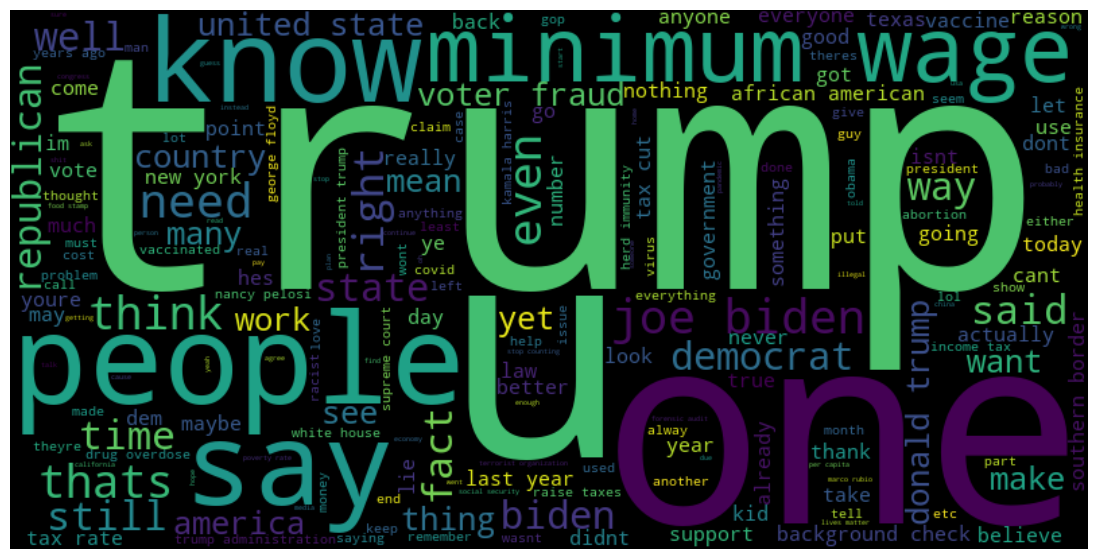

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['tweet_new'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


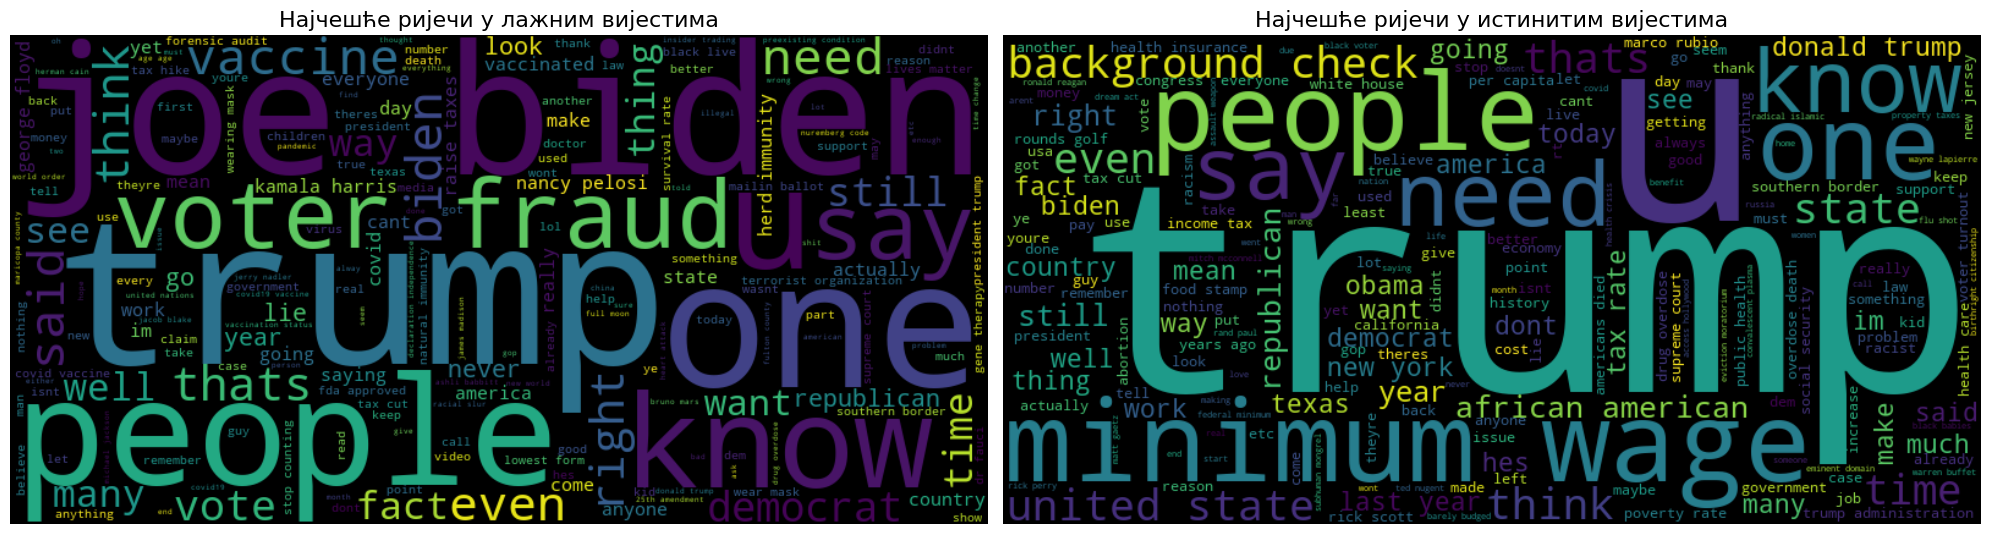

In [ ]:

df_false = df[df['BinaryNumTarget'] == 0.0]
text_false = ' '.join(df_false['tweet_new'].astype(str).tolist())
wordcloud_false = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text_false)

df_true = df[df['BinaryNumTarget'] == 1.0]
text_true = ' '.join(df_true['tweet_new'].astype(str).tolist())
wordcloud_true = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text_true)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(wordcloud_false, interpolation='bilinear')
axes[0].set_title('Најчешће ријечи у лажним вијестима', fontsize=16)
axes[0].axis('off')

axes[1].imshow(wordcloud_true, interpolation='bilinear')
axes[1].set_title('Најчешће ријечи у истинитим вијестима', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()


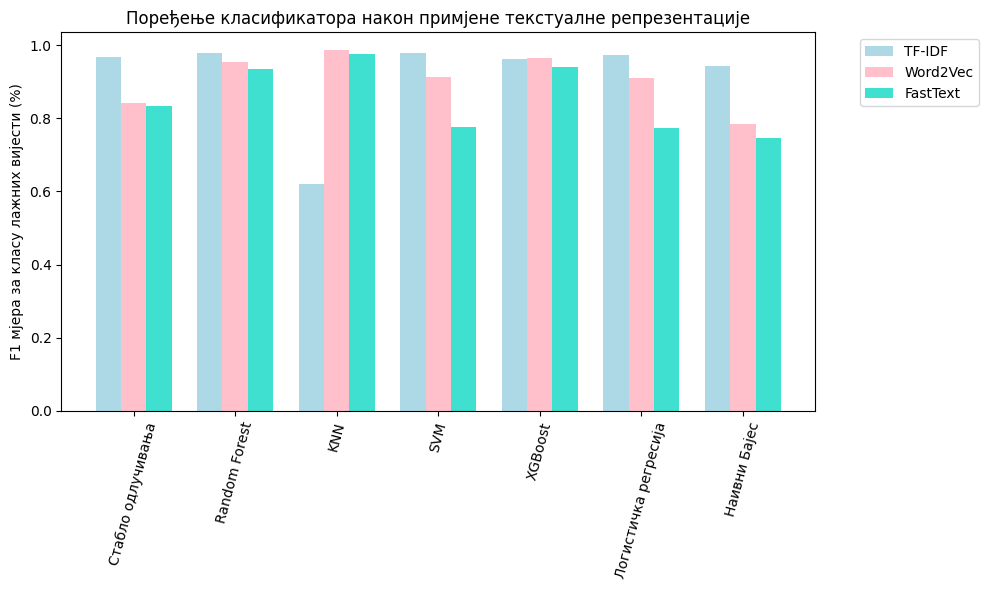

In [19]:


algorithms = ['Стабло одлучивања', 'Random Forest', 'KNN', 'SVM', 'XGBoost', 'Логистичка регресија', 'Наивни Бајес']

f1_tfidf = [0.967, 0.980, 0.621, 0.978, 0.961,0.974,0.943]
f1_word2vec = [0.841, 0.955, 0.986, 0.913, 0.966, 0.910, 0.784]
f1_fasttext = [0.835, 0.936, 0.975, 0.775, 0.940, 0.774, 0.746]

bar_width = 0.25
plt.figure(figsize=(10, 6))
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, f1_tfidf, color='lightblue', width=bar_width, label='TF-IDF')
plt.bar(r2, f1_word2vec, color='pink', width=bar_width, label='Word2Vec')
plt.bar(r3, f1_fasttext, color='turquoise', width=bar_width, label='FastText')


plt.ylabel('F1 мјера за класу лажних вијести (%)')
plt.title('Поређење класификатора након примјене текстуалне репрезентације')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms, rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


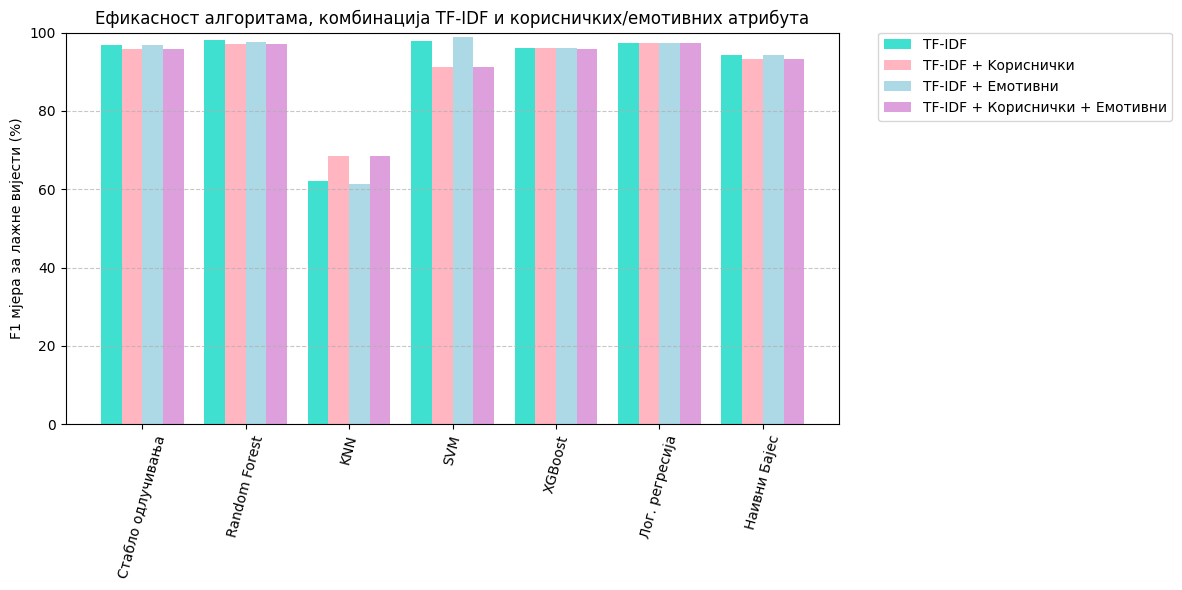

In [ ]:

algoritmi = ['Стабло одлучивања','Random Forest','KNN', 'SVM', 'XGBoost', 'Лог. регресија', 'Наивни Бајес']
x = np.arange(len(algoritmi))
width = 0.2



tf_idf = np.array([0.967, 0.980, 0.621, 0.978, 0.961, 0.974, 0.943]) * 100
tf_idf_user = np.array([0.959, 0.972, 0.684, 0.912, 0.961, 0.974, 0.933]) * 100
tf_idf_empath = np.array([0.967, 0.977, 0.614, 0.989, 0.961, 0.973,0.943]) * 100
tf_idf_ue = np.array([0.959, 0.972, 0.685, 0.912, 0.959, 0.974, 0.933]) * 100
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - 1.5*width, tf_idf, width, label='TF-IDF', color='turquoise')
bars2 = plt.bar(x - 0.5*width, tf_idf_user, width, label='TF-IDF + Kориснички', color='lightpink')
bars3 = plt.bar(x + 0.5*width, tf_idf_empath, width, label='ТF-IDF + Емотивни', color='lightblue')
bars4 = plt.bar(x + 1.5*width, tf_idf_ue, width, label='TF-IDF + Кориснички + Емотивни', color='plum')



plt.xticks(x, algoritmi, rotation=75)
plt.ylim(0, 100)
plt.ylabel('F1 мјера за лажне вијести (%)')
plt.title('Ефикасност алгоритама, комбинација TF-IDF и корисничких/емотивних атрибута')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

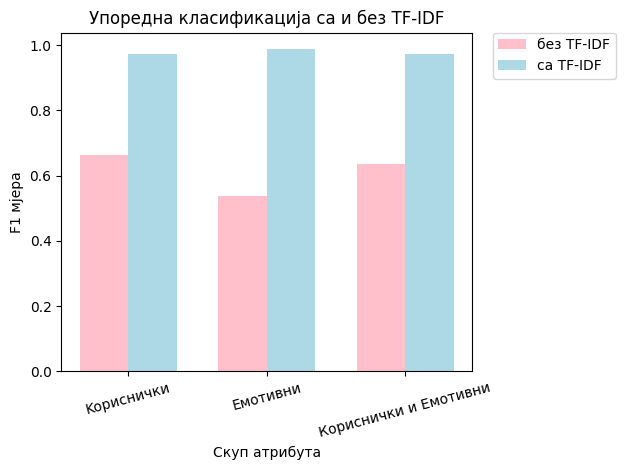

In [ ]:

labels = ['Kориснички', 'Емотивни', 'Кориснички и Емотивни']
without_tfidf = [0.664, 0.538, 0.634]
with_tfidf = [0.974, 0.989, 0.974]

x = np.arange(len(labels))  # pozicije grupa
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, without_tfidf, width, label='без TF-IDF', color='pink')
bars2 = ax.bar(x + width/2, with_tfidf, width, label='са TF-IDF', color = 'lightblue')

ax.set_ylabel('F1 мјера')
ax.set_xlabel('Скуп атрибута')
ax.set_title('Упоредна класификација са и без TF-IDF')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


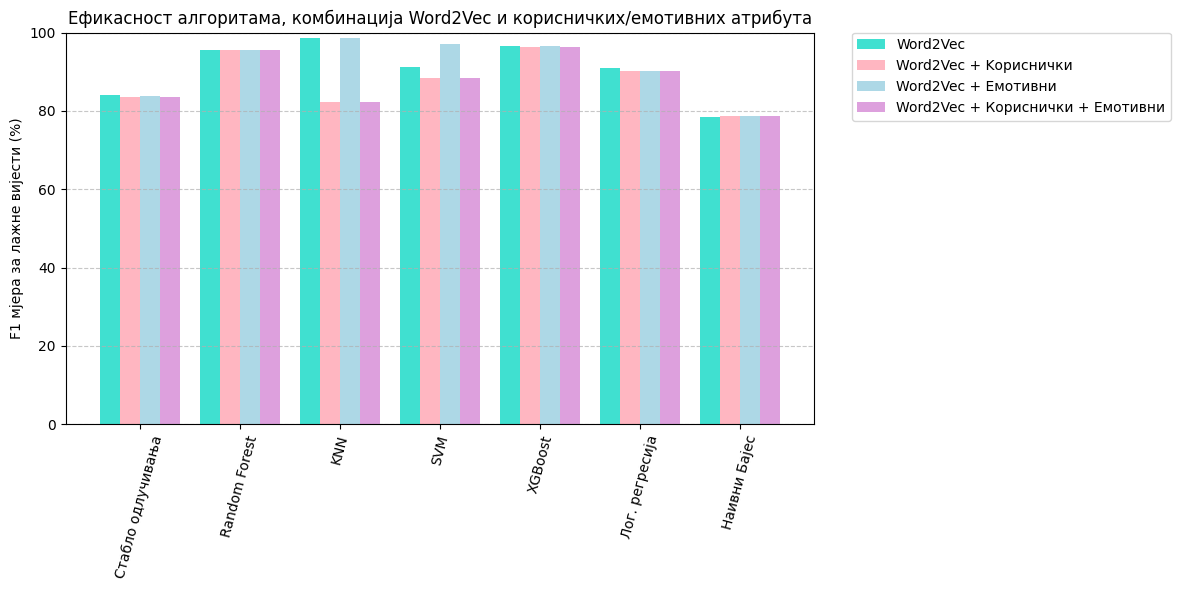

In [2]:

algoritmi = ['Стабло одлучивања','Random Forest','KNN', 'SVM', 'XGBoost', 'Лог. регресија', 'Наивни Бајес']
x = np.arange(len(algoritmi))
width = 0.2



word2vec = np.array([0.841, 0.955, 0.986, 0.913, 0.966, 0.910, 0.784]) * 100
word2vec_user = np.array([0.836, 0.955, 0.822, 0.884, 0.964, 0.903, 0.788]) * 100
word2vec_empath = np.array([0.837, 0.956, 0.987, 0.972, 0.966, 0.903, 0.786]) * 100
word2vec_ue = np.array([0.836, 0.955, 0.823, 0.884, 0.964, 0.903, 0.788]) * 100
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - 1.5*width, word2vec, width, label='Word2Vec', color='turquoise')
bars2 = plt.bar(x - 0.5*width, word2vec_user, width, label='Word2Vec + Kориснички', color='lightpink')
bars3 = plt.bar(x + 0.5*width, word2vec_empath, width, label='Word2Vec + Емотивни', color='lightblue')
bars4 = plt.bar(x + 1.5*width, word2vec_ue, width, label='Word2Vec + Кориснички + Емотивни', color='plum')



plt.xticks(x, algoritmi, rotation=75)
plt.ylim(0, 100)
plt.ylabel('F1 мјера за лажне вијести (%)')
plt.title('Ефикасност алгоритама, комбинација Word2Vec и корисничких/емотивних атрибута')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

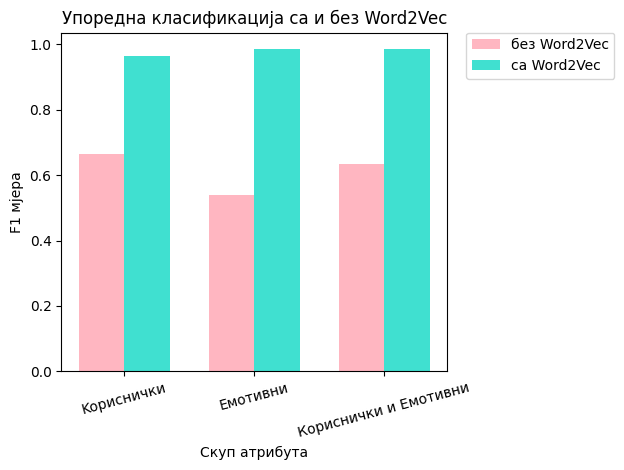

In [ ]:

labels = ['Kориснички', 'Емотивни', 'Кориснички и Емотивни']
without_tfidf = [0.664, 0.538, 0.634]
with_tfidf = [0.964, 0.987, 0.987]

x = np.arange(len(labels))  # pozicije grupa
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, without_tfidf, width, label='без Word2Vec', color='lightpink')
bars2 = ax.bar(x + width/2, with_tfidf, width, label='са Word2Vec', color = 'turquoise')

ax.set_ylabel('F1 мјера')
ax.set_xlabel('Скуп атрибута')
ax.set_title('Упоредна класификација са и без Word2Vec')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


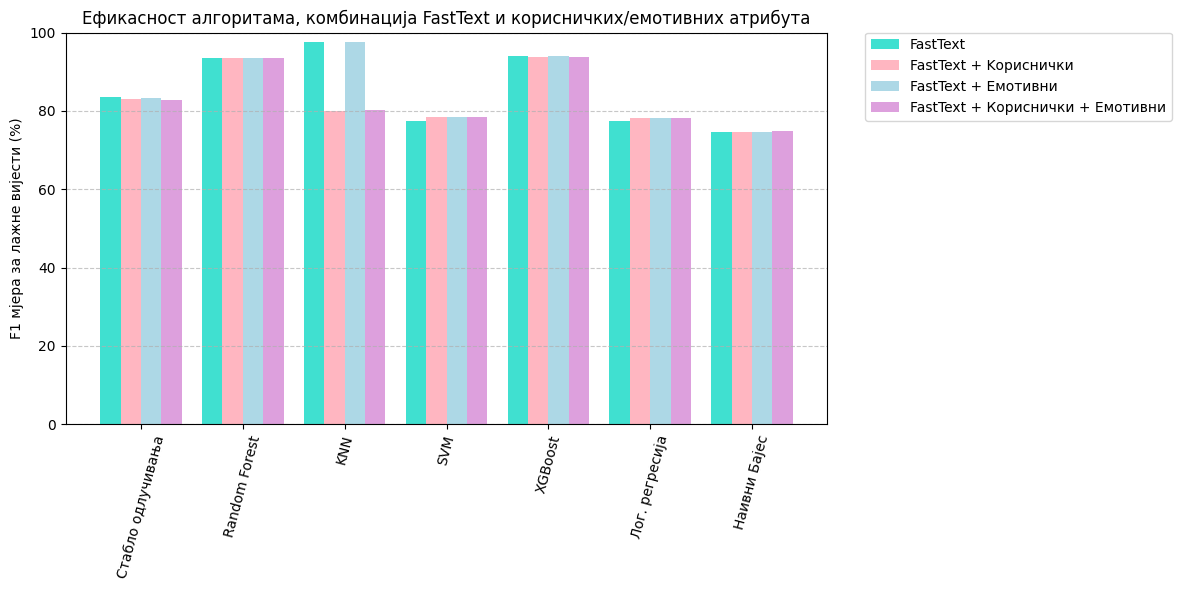

In [ ]:

algoritmi = ['Стабло одлучивања','Random Forest','KNN', 'SVM', 'XGBoost', 'Лог. регресија', 'Наивни Бајес']
x = np.arange(len(algoritmi))
width = 0.2



fasttext = np.array([0.835, 0.936, 0.975, 0.775, 0.940, 0.774, 0.746]) * 100
fasttext_user = np.array([0.830,0.936, 0.800, 0.784, 0.937, 0.782,0.747]) * 100
fasttext_empath = np.array([0.832, 0.935, 0.975, 0.785, 0.939, 0.782, 0.745]) * 100
fasttext_ue = np.array([0.828, 0.935, 0.801, 0.785, 0.938, 0.782, 0.748]) * 100
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - 1.5*width, fasttext, width, label='FastText', color='turquoise')
bars2 = plt.bar(x - 0.5*width, fasttext_user, width, label='FastText + Kориснички', color='lightpink')
bars3 = plt.bar(x + 0.5*width, fasttext_empath, width, label='FastText + Емотивни', color='lightblue')
bars4 = plt.bar(x + 1.5*width, fasttext_ue, width, label='FastText + Кориснички + Емотивни', color='plum')



plt.xticks(x, algoritmi, rotation=75)
plt.ylim(0, 100)
plt.ylabel('F1 мјера за лажне вијести (%)')
plt.title('Ефикасност алгоритама, комбинација FastText и корисничких/емотивних атрибута')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()